# ML voor beeldherkenning

## Computer vision
(target-computer-vision)=
Computer vision is, naast natural language processing (NLP), een domein binnen machine learning waar alles draait rond neurale netwerkmodellen. **Computer vision richt zich op het automatisch interpreteren en begrijpen van digitale beelden**. Het domein stond in het middelpunt van verschillende grote AI doorbraken. Het onderging in de voorbije decennia een ware transformatie onder impuls van (diepe) _Convolutional Neural Networks (CNN)_ en meest recent, _Vision Transformers_.  
  
In tegenstelling tot gestructureerde data waar we werken met tabulaire gegevens, hebben we hier te maken met beelden (RGB, RGB-D, hyper-spectraal, point-cloud) en sequenties daarvan. Het zijn bij uitstek voorbeelden van **ongestructureerde data**.  

:::{important} Eigenschappen
- **homogene inputvariabelen**: Meestal een grid van RGB pixels of een sequentie daarvan
- **Complexe, variabele patronen** - zeker in een natuurlijke omgeving.
- **Veel trainingsdata nodig**
- **supervised of semi-supervised learning**
- **Vrijwel altijd op basis van neurale netwerk modellen**
:::
  
Alles draait om de **automatische extractie van visuele patronen**. Daar waar dit lang gebeurde op basis van deterministische filters, brachten CNNs de mogelijkheid om die filters rechtstreeks uit de data te leren wat een enorme sprong in performantie en flexibiliteit met zich meebracht. 


:::{note} Deterministische filter
:icon: false
:class: dropdown 
Een voorbeeld van een deterministische filter is het _Canny edge detection_ algoritme.

[![](https://img.shields.io/badge/Wikipedia-000?logo=wikipedia&logoColor=fff&style=flat)](https://en.wikipedia.org/wiki/Canny_edge_detector)

_Canny edge detection_ is een klassieke computer vision techniek die randen in beelden detecteert aan de hand van een reeks vaste bewerkingen:

1. _Noise reduction_: Gaussian blur filter om ruis te verminderen
2. _Gradient berekening_: Bepalen van intensiteitsgradiënten (Sobel filters)
3. _Non-maximum suppression_: Dunne randen behouden, dikke randen elimineren
4. _Double threshold_: Onderscheid tussen sterke en zwakke randen
5. _Edge tracking by hysteresis_: Zwakke randen behouden enkel als ze verbonden zijn met sterke randen

Dit is een volledig **deterministisch proces** - er worden géén parameters geleerd uit data. De filters en drempelwaarden zijn handmatig ontworpen door domeinexperts. Dit contrasteert sterk met moderne deep learning benaderingen waar CNNs automatisch optimale filters leren uit trainingsdata.
:::

In [1]:
import cv2
import numpy as np
from matplotlib import patches
from matplotlib import pyplot as plt

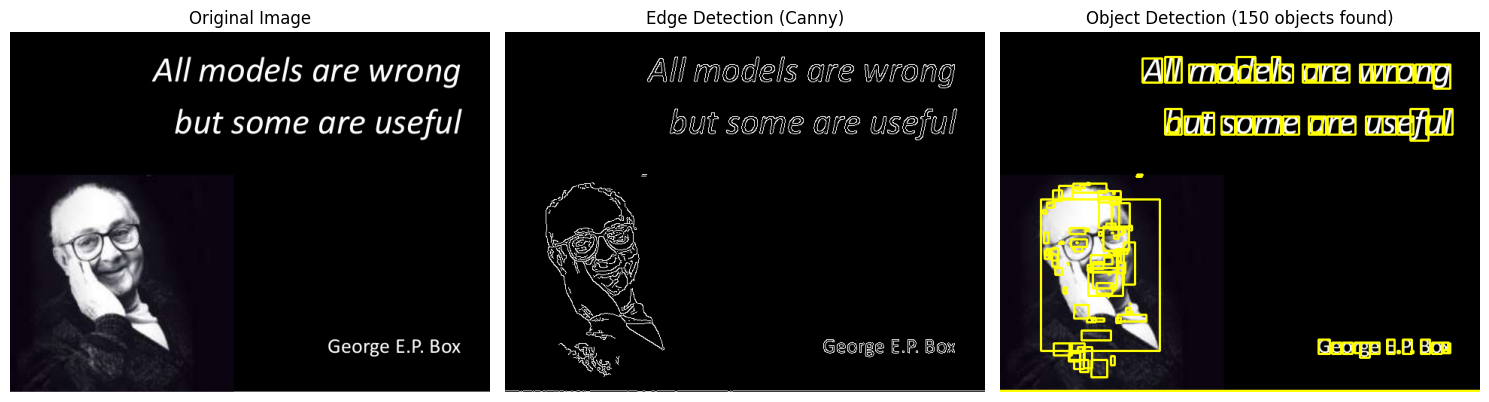

In [2]:
# Load an example image (you can replace this with your own image path)
# For demo purposes, we'll create a simple synthetic image
image = np.ones((400, 600, 3), dtype=np.uint8) * 255

# Add some simple shapes to detect
cv2.rectangle(image, (50, 50), (150, 150), (255, 0, 0), -1)
cv2.circle(image, (400, 200), 60, (0, 255, 0), -1)
cv2.rectangle(image, (450, 300), (550, 380), (0, 0, 255), -1)


image = cv2.imread("../../../img/all_models_are_wrong.jpg")

# Convert to grayscale for feature detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_single = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection (deterministic feature extraction)
edges = cv2.Canny(gray_single, 50, 150)

# Find contours (object detection based on edges)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around detected objects
result = image.copy()
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 255), 2)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(edges, cmap="gray")
axes[1].set_title("Edge Detection (Canny)")
axes[1].axis("off")

axes[2].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
axes[2].set_title(f"Object Detection ({len(contours)} objects found)")
axes[2].axis("off")

plt.tight_layout()
plt.show()


## Convolutionele Neurale Netwerk Modellen

(target-cnns)=  
**Convolutionele Neurale Netwerken** (CNNs) hebben lange tijd (voor de komst van _Vision Transformers_) het domein van machine learning voor computer vision gedomineerd.  
Het basis concept is dat ze **in plaats van deterministische filters, aangeleerde (dus data-gedreven) filters toepassen om predicties te maken**. Daardoor zijn ze veel flexibeler dan traditionele beeldverwerkings _pipelines_.  

[![](https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png?fit=1400%2C658&ssl=1?raw=true)](https://developersbreach.com/convolution-neural-network-deep-learning/)
  
CNNs bestaan uit verschillende hiërarchische gestructureerde lagen. De lagen verschillen van elkaar naargelang de specifieke tensor-operaties die worden uitgevoerd. Deze familie van _deep-learning_ neurale netwerken danken hun naam aan een specifiek type laag: _convolutionele filters_. Een dergelijke filter is in essentie een kleine tensor (een _kernel_ genaamd) die over het input-grid verschoven wordt en waarmee een output-grid gecreëerd wordt via element-gewijze vermenigvuldiging en optelling.

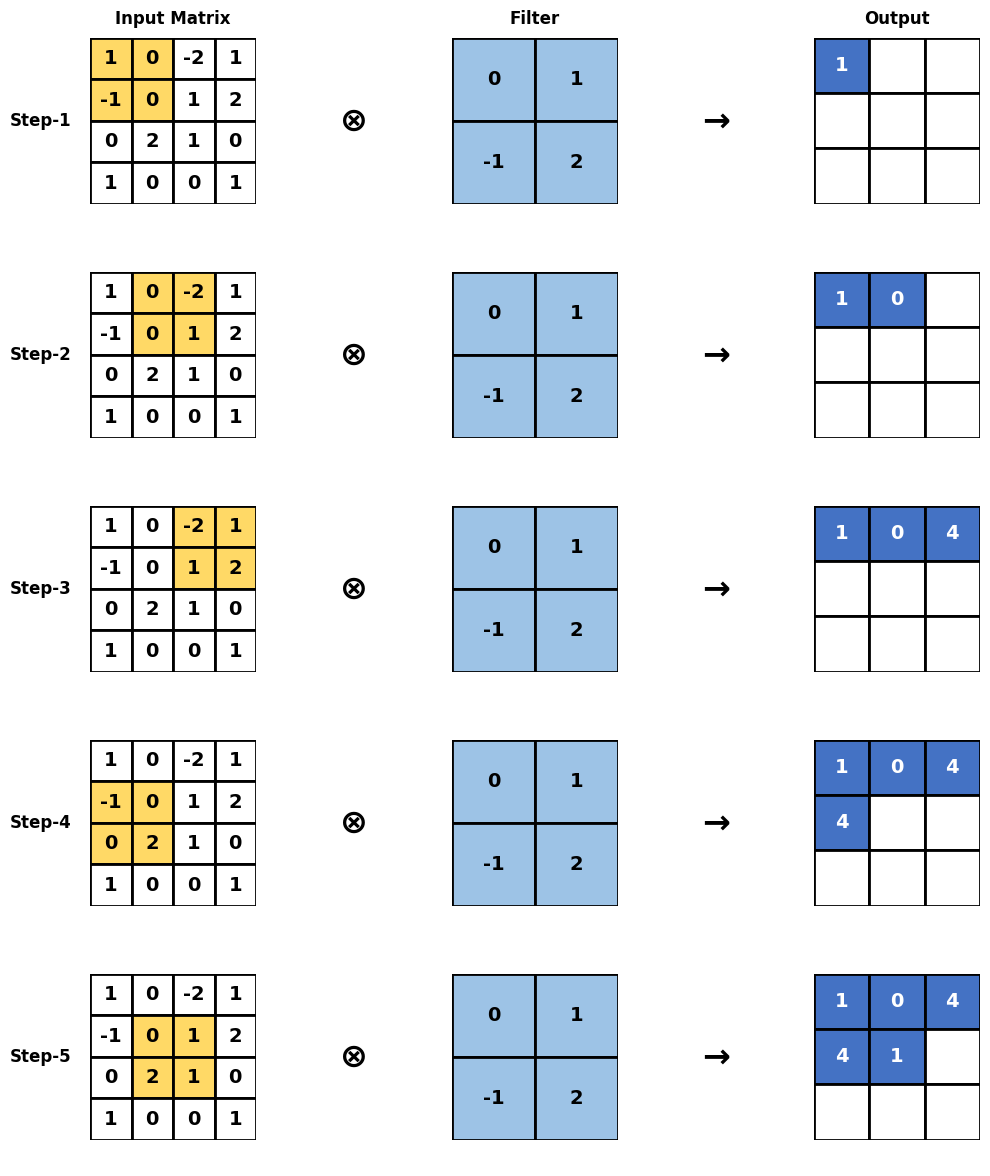


Calculations for each step:
Step 1: (1*0) + (0*1) + (-1*-1) + (0*2) = 1
Step 2: (0*0) + (-2*1) + (0*-1) + (1*2) = 0
Step 3: (-2*0) + (1*1) + (1*-1) + (2*2) = 4
Step 4: (-1*0) + (0*1) + (0*-1) + (2*2) = 4
Step 5: (0*0) + (1*1) + (2*-1) + (1*2) = 1


In [3]:
from ml_courses.sim.cnn_viz import (
    visualize_activation_functions,
    visualize_convolution_steps,
    visualize_max_pooling,
    visualize_padding,
    visualize_stride_comparison,
)

visualize_convolution_steps()

De convolutionele filter fungeert als een soort "lens" die over de input bewogen wordt.  
Vaak wordt de input aangevuld met constante waarden (meestal $0$) om bij de output gelijke dimensies als bij de input te krijgen. Dit proces wordt _padding_ genoemd.

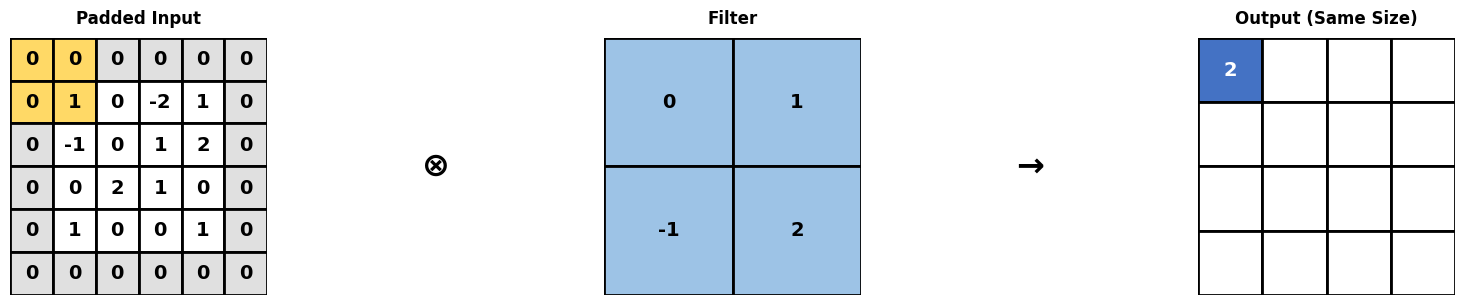


Calculation: (0*0) + (0*1) + (0*-1) + (1*2) = 2


In [4]:
visualize_padding()

De grootte van de stappen waarmee de filter verschoven wordt, noemt men de _stride_.

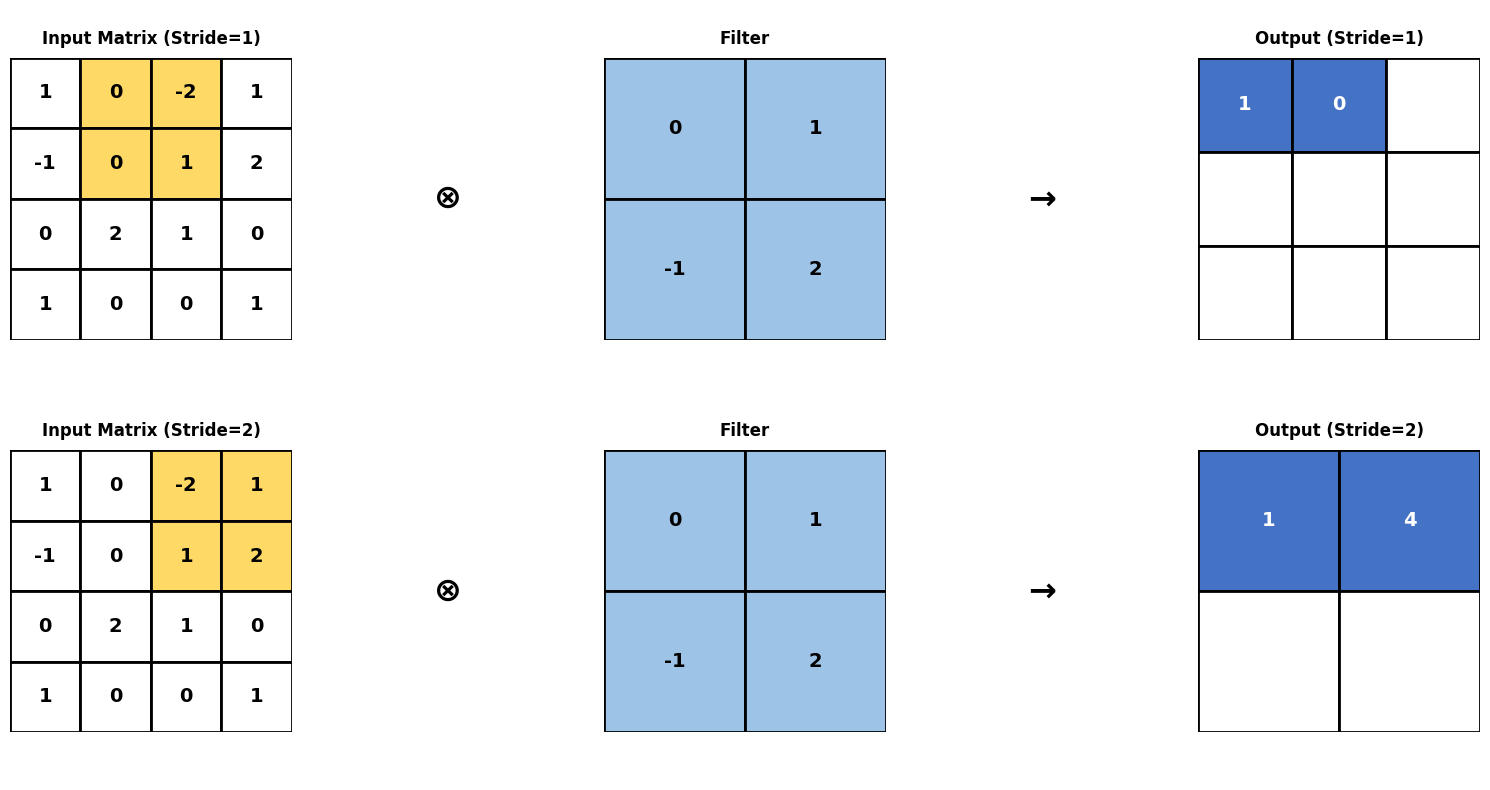


Stride=1, Step 2:
(0*0) + (-2*1) + (0*-1) + (1*2) = 0

Stride=2, Step 2:
(-2*0) + (1*1) + (1*-1) + (2*2) = 4


In [5]:
visualize_stride_comparison()

:::{note} Niet-convolutionele lagen  
:class: dropdown  
Convolutionele lagen worden afgewisseld met andere laagtypes waarin andere tensoroperaties toegepast worden. Ze vormen samen een meerlagige ("diepe"; _deep_) structuur. Voorbeelden van niet-convolutionele lagen/operaties zijn:
- Rectificatie via lineaire units (ReLU): $x^+ = max(0, x)$  
- _Pooling_: Downsampling via aggregatie (bv. _max pooling_) 
- _Drop out_: Random uitschakelen van connecties
- enz.  
  
[![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/500px-Comparison_image_neural_networks.svg.png?raw=true)](https://en.wikipedia.org/wiki/Convolutional_neural_network)
:::

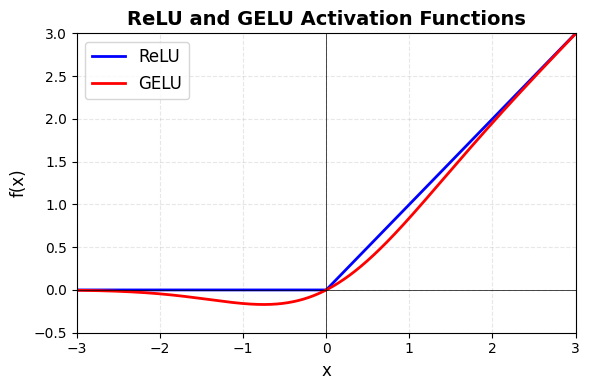

In [6]:
# visualize ReLU and Sigmoid activation functions
visualize_activation_functions()


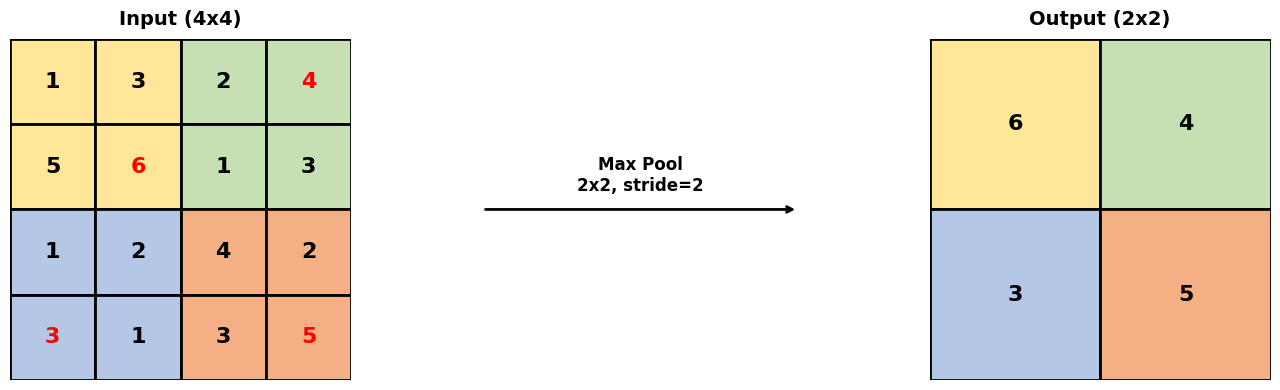

Max Pooling Calculations (2x2 with stride 2):

Top-left region: max([1 3 5 6]) = 6
Top-right region: max([2 4 1 3]) = 4
Bottom-left region: max([1 2 3 1]) = 3
Bottom-right region: max([4 2 3 5]) = 5


In [7]:
# visualise max pooling operation
visualize_max_pooling()

:::{note} 🌍 Online CNN demo #1
:icon: false
:class: dropdown  
[![](https://adamharley.com/nn_vis/images/convnet_480.png)](https://adamharley.com/nn_vis/cnn/3d.html)
:::

### Parameters
(target-cnn-parameters)=  
**De convolutionele _kernels_ zijn het voorwerp van training en hun elementen zijn de belangrijkste parameters van het model**. Merk op dat iedere kernel ongewijzigd wordt toegepast op alle secties van de input. Iedere kernel heeft een maximale output bij zijn eigen specifieke patroon. Het zijn dus echte _pattern matching devices_. Naargelang de specifieke CNN architectuur zijn er nog bijkomende parameters, zoals lineaire gewichten bij _fully connected_ output lagen.
  
:::{note} 🌍 Online CNN demo #2
:icon: false
:class: dropdown
[![](https://poloclub.github.io/cnn-explainer/assets/figures/convlayer_detailedview_demo.gif)](https://poloclub.github.io/cnn-explainer/)
:::

### Features
(target-cnn-features)=  
Bij traditionele beeldsensoren zijn alle pixels van een beeld of beelden de input features voor een computer vision model. Er gebeurt **geen selectie van pixels, al kan er wel beslist worden om beelden te vervormen** (vaak om meer variatie in de dataset te brengen):
- _Crop_: Er worden nieuwe beelden gemaakt via uitsnijding.
- Rotatie: Beelden worden onder verschillende hoeken gedraaid.
- Spiegelbeelden
- Schaling
- enz.  
  
(target-image-channels)=  
Naargelang de specifieke sensor, zijn er per pixel andere **kanalen** (_channels_) beschikbaar. Daar gebeuren soms wel selecties en/of transformaties. Bij standaard sensoren hebben we drie kanalen: rood, groen en blauw (RGB). Soms is er slechts één kanaal (bv. Röntgen scans of RGB beelden die omgezet worden in grijswaarden). Via fusion met andere sensoren is er soms een extra kanaal met diepte-informatie (RGB-D). Bij hyper-spectrale beeldvorming zijn er honderden kanalen (overeenkomstig met verschillende golflengtes in het lichtspectrum) en wordt vaak gefocust op bepaalde _banden_ (bv. infrarood).
  
:::{note} 🌍 Hyper-spectrale beeldvorming
:icon: false
:class: dropdown
[![](https://www.spectralpython.net/_images/hypercube.jpg)](https://www.spectralpython.net/)
:::

Tenslotte wordt bij bepaalde toepassingen ook gewerkt met _point clouds_ - voornamelijk afkomstig van LiDAR sensoren. Hier zijn specifieke uitdagingen omdat het om _sparse_ 3D features gaat.  
  
:::{note} 🌍 LiDAR
:icon: false
:class: dropdown
[![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*N3wBVTOMubjAcgLKJUpGjQ.png)](https://medium.com/@BlanchR2/visualize-your-city-in-3d-a-quick-guide-to-lidar-point-clouds-in-python-00ae3cb2741b)
:::

### Leeralgoritme
Parameteroptimalisatie gebeurt iteratief via een vorm van stochastische _gradient descent_ (SGD) met zogenaamde **backpropagation** [^math_foundations].
  
Er bestaat veel variatie in _loss_ functies. Bij classificatie wordt bijvoorbeeld vaak gewerkt met _cross-entropy_ (de "afstand" tussen output en target _class probabilities_), terwijl er voor objectdetectie kan gewerkt worden met de _Intersection over Union_.  
  
:::{note} _Intersection over Union_
:class: dropdown
[![](https://upload.wikimedia.org/wikipedia/commons/2/2d/Intersection_over_Union_-_object_detection_bounding_boxes.jpg)](https://en.wikipedia.org/wiki/Jaccard_index)
[![](https://upload.wikimedia.org/wikipedia/commons/c/c7/Intersection_over_Union_-_visual_equation.png)](https://en.wikipedia.org/wiki/Jaccard_index)
:::  
  
[^math_foundations]: Zie cursus _Mathematical Foundations_.


#### Variabiliteit

Beelden zijn **inherent complex en variabel** - zeker wanneer ze _niet_ uit een gecontroleerde setting afkomstig zijn:
- Schaalgrootte: Zelfde objecten kunnen op heel verschillende afstanden van de camera staan en dus grote variaties in schaal vertonen
- Rotatie en perspectief: Objecten kunnen gedraaid zijn of vanuit verschillende hoeken bekeken worden
- Belichting: Lichtomstandigheden kunnen sterk variëren (dag/nacht, binnen/buiten, schaduwen)
- Occlusie: Objecten kunnen gedeeltelijk achter andere objecten verborgen zijn
- Achtergrond: Complexe achtergronden maken het onderscheiden van objecten moeilijk
- Resolutie: Zelfde objecten kunnen ook afhankelijk van de resolutie van de sensoren heel anders in beeld komen
- Optische lens: Een lens kan voor onscherpte zorgen, maar ook specifieke vervormingen (bv. _fish eye_ lenzen)
  
:::{note} 🌍 Fish-Eye Lens
:icon: false
:class: dropdown
[![](https://vip.bu.edu/files/2020/05/Edge_teaser_w_count.gif)](https://vip.bu.edu/projects/vsns/cossy/fisheye/rapid/)
:::
  
Wanneer het belangrijk is voor de use-case om dezelfde objecten te kunnen herkennen op verschillende afstanden, bij verschillende belichting, enz. , moet er extra aandacht gaan naar het weerspiegelen van de juiste variabiliteit in de trainingsdata. Het is in die context niet verwonderlijk dat de meest performante modellen voor beeldanalyse _in the wild_ afkomstig zijn van internetgiganten met rechtstreekse toegang tot **enorme hoeveelheden natuurlijk beeldmateriaal** zoals Google en Meta. In gecontroleerde settings zoals productielijnen wordt samen met een camerasensor ook specifieke belichting voorzien om variabiliteit te verkleinen.
  
:::{note} 🌍 Belichting
:icon: false
:class: dropdown
[![](https://advancedillumination.com/wp-content/uploads/2023/03/fig1-768x169.png)](https://advancedillumination.com/a-practical-guide-to-machine-vision-lighting/)
:::

### Taken
Computer vision modellen worden voor verschillende taken gebruikt. In veel gevallen wordt een zelfde basis CNN-architectuur (model _backbone_) gebruikt en wordt enkel de toplaag of -lagen (model _head_) ingewisseld voor taak-specifieke noden.

#### Klassificatie
Het model moet leren om beelden in hun geheel te categoriseren (binair of _multi-class_). Dit is één van de fundamentele taken in computer vision waarbij het hele beeld één label krijgt.
  
:::{note} 🌍
:icon: false
:class: dropdown
Voorbeelden:  
- [_Inception_](https://en.wikipedia.org/wiki/Inception_(deep_learning_architecture)#Inception_v3) 
- [_ResNet_](https://en.wikipedia.org/wiki/Residual_neural_network)

Zie {ref}`CIFAR benchmark <target-cifar>`
:::

#### Objectdetectie
Het model moet leren om objecten te labelen én te lokaliseren binnen beelden aan de hand van _bounding boxes_. Er bestaan verschillende varianten die op geheel andere wijze tot detecties komen.
  
:::{note} 🌍
:icon: false
:class: dropdown
Voorbeelden:  
- [_Faster R-CNN_](https://en.wikipedia.org/wiki/Region_Based_Convolutional_Neural_Networks)
- [_YOLO_](https://en.wikipedia.org/wiki/You_Only_Look_Once)
  
[![](https://docs.pytorch.org/tutorials/_static/img/tv_tutorial/tv_image03.png?raw=true)](https://docs.pytorch.org/tutorials/intermediate/torchvision_tutorial.html)
:::

#### Semantische segmentatie
Het model moet leren om op het niveau van pixels _class labels_ toe te kennen. Er wordt geen onderscheid gemaakt tussen verschillende instanties van eenzelfde klasse.
  
:::{note} 🌍
:icon: false
:class: dropdown
Voorbeelden:  
- [_U-Net_](https://en.wikipedia.org/wiki/U-Net)
- [_DeepLab_](https://arxiv.org/pdf/1606.00915)

[![](https://cdn.prod.website-files.com/614c82ed388d53640613982e/64aeb2b8290388b2382cc139_semantic%20segmentation.webp)](https://www.superannotate.com/blog/image-segmentation-for-machine-learning)
:::

#### _Instance_ segmentatie
Hier maakt het model voorspellingen over de exacte begrenzing ieder object op pixelniveau.
  
:::{note} 🌍
:icon: false
:class: dropdown
Voorbeeld:  
- [_Segment Anything_](https://github.com/facebookresearch/segment-anything)  
  
[![](https://cdn.prod.website-files.com/614c82ed388d53640613982e/64aeb1de1cc4072e91e1932c_instance%20segmentation.webp)](https://www.superannotate.com/blog/image-segmentation-for-machine-learning)
:::  

#### _Key point_ detectie
Het model moet specifieke anatomische of structurele punten lokaliseren in beelden, zoals gewrichten bij mensen of knooppunten bij objecten.
  
:::{note} 🌍
:icon: false
:class: dropdown
Voorbeelden:  
- [_OpenPose_](https://github.com/CMU-Perceptual-Computing-Lab/openpose)
- [_ASMNet_](https://arxiv.org/pdf/2103.00119)

[![](https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/.github/media/dance_foot.gif?raw=true)](https://github.com/CMU-Perceptual-Computing-Lab/openpose/tree/master)
:::

#### Diepteschatting
Het model moet inschatten hoe ver objecten van de camera verwijderd zijn door zogenaamde _depth maps_ te voorspellen
  
:::{note} 🌍
:icon: false
:class: dropdown
Voorbeeld:  
- _Depth Anything_ [![Hugging Face Spaces](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue)](https://huggingface.co/spaces/depth-anything/Depth-Anything-V2gg)
  
[![](https://depth-anything.github.io/static/images/teaser.png?raw=true)](https://depth-anything.github.io/)
:::

#### _Text detection_
Het model moet tekstuele regio's in beelden detecteren en lokaliseren (zonder de tekst zelf te herkennen). Dit is vaak de eerste stap in een OCR-pipeline.
  
:::{note} 🌍
:icon: false
:class: dropdown
Voorbeeld: 
- [_EAST_](https://arxiv.org/pdf/1704.03155)

[![](https://miro.medium.com/v2/resize:fit:640/format:webp/0*SPFi3PHcGplsmz9t.png?raw=true)](https://openaccess.thecvf.com/content_cvpr_2017/papers/Zhou_EAST_An_Efficient_CVPR_2017_paper.pdf)
:::

#### _Optical Character Recognition_ (OCR)
Het model moet tekst in beelden herkennen en transcriberen naar machine-leesbare tekst. 
  
:::{note} 🌍
:icon: false
:class: dropdown
Voorbeeld: 
- [_CRNN_](https://arxiv.org/pdf/1507.05717)
  
[![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*zeqBrP_Kqt5ellyCGjnIqw.png?raw=true)](https://eng-mhasan.medium.com/ocr-with-deep-learning-in-python-e443970d09e4)
:::

#### _Representation learning_
Het model leert algemene beeldrepresentaties (ook _embeddings_ genoemd) die nuttig zijn voor diverse downstream taken, zoals vector similarity search en few-/zero-shot klassificatie.

:::{note} 🌍
:icon: false
:class: dropdown
Voorbeeld: 
- [_SimCLR_](https://research.google/blog/advancing-self-supervised-and-semi-supervised-learning-with-simclr/)
  
[![](https://kempnerinstitute.harvard.edu/app/uploads/2024/09/6-scaled.jpg?raw=true)](https://kempnerinstitute.harvard.edu/research/deeper-learning/contrastive-learning-explains-the-emergence-and-function-of-visual-category-selectivity/)
:::

### Ervaring
#### _Supervised learning_
(target-image-annotation)=  
_Supervised learning_ is heel lang de gouden standaard geweest om CNNs te trainen. Het **verkrijgen van targets of zogenaamde _ground truth data_ (_class labels_, _bounding boxes_, segmentatie polygonen, _keypoints_, _captions_ enz.)** is echter niet vanzelfsprekend zoals bij het voorspellen van huisprijzen. Dit proces heet **beeldannotatie**. De grote doorbraken in vision AI zijn er gekomen dankzij enorme investeringen in annotatie door grote internetbedrijven. 
  
:::{note} 🌍 Beeldannotatie
:icon: false
:class: dropdown
Er bestaan verschillende annotatieplatformen om beeldannotatie minder arbeidsintensief en meer betrouwbaar te maken (bv. het oorspronkelijk Belgische [segments.ai](https://segments.ai/)).  
    
Er zijn ook slimme applicaties om via _crowdsourcing_ geannoteerde beelden te bekomen.  
  
[![](https://miro.medium.com/v2/resize:fit:640/format:webp/0*cLG4GBuTx3lie90T.png?raw=true)](https://medium.com/nerd-for-tech/data-annotation-service-by-typing-captcha-you-are-actually-helping-ai-model-training-5902e8794a6f)  
  
Afhankelijk van de taak bestaan er verschillende publieke _geannoteerde_ dataset die ook fungeren als gestandaardiseerde _benchmarks_:
- [_ImageNet_](https://www.image-net.org/): Een iconische dataset voor klassificatie met ~14 miljoen beelden verdeeld over 20.000+ categorieën.
- [_COCO_](https://cocodataset.org/#home) (Common Objects in Context): ~330.000 beelden met meer dan 200.000 gelabelde objecten in 80 categorieën. Bevat ook annotaties voor segmentatie, _keypoints_ en captioning.
- [_Cityscapes_](https://www.cityscapes-dataset.com/): 25.000 beelden van straten met pixel-level annotaties voor 30 klassen (voertuigen, voetgangers, wegen, etc.)
- [_Street View Text_](https://vision.ucsd.edu/datasets/street-view-text): Beelden van Google Street View met tekstannotaties voor _scene text recognition_.
- [_ChestX-ray14_](https://huggingface.co/datasets/alkzar90/NIH-Chest-X-ray-dataset): 112.000 röntgenfoto's van de borst met labels voor 14 pathologieën.
- [_Waymo Open Dataset_](https://waymo.com/open/): ~1000 rijsegmenten (elk ~20 seconden); Hoge-resolutie camera beelden (5 camera's); LiDAR point clouds; 3D bounding box annotaties voor voertuigen, voetgangers, fietsers en verkeersborden; ~12 miljoen 3D labels
- enz.
:::

#### _Transfer learning_ en _fine tuning_
(target-transfer-learning)=  
Om een goede performantie te krijgen, zeker bij natuurlijk beeldmateriaal, zijn voor _supervised learning_ heel veel geannoteerde trainingsdata nodig en bijgevolg ook veel trainingstijd. Omdat veel grote getrainde modellen open-source beschikbaar zijn, wordt in de praktijk vaak met **_transfer learning_** gewerkt. **_Transfer learning_ betekent dat je een model dat reeds getraind is op een hele grote dataset (bijvoorbeeld ImageNet) hergebruikt voor een nieuwe, gerelateerde taak**. Het basisidee is dat de vroege lagen van een CNN generieke features leren (randen, texturen, kleuren) die nuttig zijn voor veel verschillende taken, terwijl de latere lagen meer taak-specifieke features leren. In de praktijk komt dit neer op het vervangen de laatste taak-specifieke laag/lagen in het netwerk (de _model head_; bv. een lineaire regressielaag). Dit heeft als voordeel dat je doorgaans met een veel kleinere geannoteerde dataset een goede performantie kan bekomen. Dit fenomeen heet _few-shot_, of in het extreme geval, _zero-shot learning_.
  
**_Fine tuning_ is een gerelateerde aanpak waarbij onderste (feature-extractie) lagen worden _bij-getraind_ (vertrekkende van hun vooraf getrainde waarden)**.

#### _Self-supervision_
(target-self-supervision)=  
De jongste jaren is er meer en meer aandacht voor training op basis van **_self-supervision_**. Hierbij wordt algemeen gesproken met een **niet-geannoteerde dataset gewerkt van waaruit toch een _supervised learning_ procedure wordt bekomen door _surrogaat_ labels te creëren**. Een specifiek voorbeeld hiervan is _contrastive learning_. Voor iedere input worden getransformeerde varianten gemaakt. Het model wordt dan getraind met een _loss_ functie die de afstand tussen output tensors minimaliseert bij die varianten. Daarnaast wordt de afstand tussen output tensors gemaximaliseerd bij twee verschillende inputbeelden. Na een dergelijke generieke trainingsfase wordt dan in een tweede fase via _transfer learning_ of _fine tuning_, met een kleine set geannoteerde beelden een taakspecifiek model getraind.

- [_SimCLR_](https://research.google/blog/advancing-self-supervised-and-semi-supervised-learning-with-simclr/)

### Evaluatie
Afhankelijk van de taak zijn er een aantal specifieke _score metrics_ gangbaar in de context van _computer vision_.

#### Klassificatie
Voor klassificatie wordt naar standaard _score metrics_ gekeken zoals _{ref}`accuracy <target-accuracy>`_, _{ref}`precision <target-precision>`_, _{ref}`recall <target-recall>`_, {ref}`F-scores <target-F-score>`

#### Objectdetectie
- [_Intersection over Union_ (IoU) of _Jaccard Index_](https://en.wikipedia.org/wiki/Jaccard_index): Meet de overlap tussen voorspelde en _ground truth_ bounding boxes.
- [_Mean Average Precision_ (mAP)](https://blog.roboflow.com/mean-average-precision/): Combineert zowel de nauwkeurigheid van detecties als de volledigheid ervan. 

#### Segmentatie
- _Pixel Accuracy_: Percentage correct geclassificeerde pixels
- _Mean Intersection over Union_ (mIoU): Gemiddelde IoU over alle klassen
- _Dice Coefficient_: Meet de overlap tussen predicted en ground truth segmentaties. Vergelijkbaar met IoU maar geeft meer gewicht aan true positives.

#### _Key point_ detectie
- _Percentage of Correct Key points_ (PCK): Percentage _key points_ binnen een tolerantieafstand.
- _Mean Per Joint Position Error_ (MPJPE): Gemiddelde Euclidische afstand tussen voorspelde en _ground truth key points_.

#### OCR
- _Character Error Rate_ (CER): Percentage foutief voorspelde karakters/woorden.

#### _Explainability_
Deep learning modellen zijn alomtegenwoordig voor computer vision taken. Dit type modellen zijn echter in grote mate _black boxes_. Het is heel moeilijk om model parameters te interpreteren en bijgevolg om te begrijpen hoe een specifieke modeloutput tot stand komt. Hierdoor ontstaat ook een ernstig risico op _model artefacten_. 
  
:::{note} 🌍
:icon: false
:class: dropdown
[![](https://cdn.ncbi.nlm.nih.gov/pmc/blobs/5ec4/6219764/fee54eb3825c/pmed.1002683.g002.jpg?raw=true)](https://doi.org/10.1371/journal.pmed.1002683)  
  
[![](https://thegradient.pub/content/images/size/w800/2020/11/main-8.png)](https://thegradient.pub/interpretability-in-ml-a-broad-overview/)
:::

### Voordelen
- Flexibel gebruik in verschillende domeinen
- Hergebruik/finetuning mogelijk met kleine datasets

### Nadelen
- Computationeel zwaar: Kan geaccelereerd worden met GPUs/TPUs/enz., maar deze infrastructuur is zeer kostelijk. Zeker wanneer er _(near) realtime_ beeldverwerking gewenst is (zoals bij bewakingscamera's) kan dit praktisch zeer uitdagend zijn.
- Interpreteerbaarheid: Complexe, ontransparante modelarchitectuur - weliswaar zijn technieken ontwikkeld om inzicht te krijgen in _feature maps_
- Heel veel data en trainingstijd voor nieuwe domeinen

:::{note} 🌍 _Quantization_
:icon: false
:class: dropdown
Om _near realtime_ te kunnen werken wordt, naast hardware-accelerators (GPU/TPU/enz.), een beroep gedaan op speciaal ontworpen "kleine" CNN architecturen (bv. [MobileNet](https://en.wikipedia.org/wiki/MobileNet)) die op relatief lage input resoluties werken. Daarnaast wordt er ook vaak _quantization_ toegepast op de parameters. _Quantization_ houdt algemeen in dat de precisie van parameters na het trainen wordt verlaagd (bv. `int8` in plaat van `float32`).
:::

## _Foundation_ Modellen
De laatste jaren is de flexibiliteit van _computer vision modellen_ nog veel groter geworden door de komst van zogenaamde _foundation_ modellen. Dit zijn doorgaans zeer omvangrijke (_large_) modellen die met enorme hoeveelheden beelden getraind zijn met ook verschillende taken (object detectie, segmentatie, captioning enz.). Ze hebben een enorme generalisatie capaciteit. Dit wil zeggen dat ze erg goede performantie behalen bij ongezien data. AI engineers kunnen daardoor meer en meer een beroep doen op vooraf getrainde of _pre-trained_ modellen die zonder of met minimale extra training ingezet kunnen worden.

:::{note} 🌍
:icon: false
:class: simple  
Het `Florence` model van Microsoft is een voorbeeld van een _foundation_ vision model.
:::

In [8]:
import random

from PIL import Image, ImageDraw
from transformers import AutoModelForCausalLM, AutoProcessor


In [9]:
model_id = "microsoft/Florence-2-base"
model = AutoModelForCausalLM.from_pretrained(
    model_id, attn_implementation="eager", trust_remote_code=True
)
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)


In [10]:
def run_example(task_prompt, text_input=None):
    """Run Florence model inference on an image with a given task prompt.

    Args:
        task_prompt: The task prompt for the model (e.g., '<CAPTION>', '<OBJECT_DETECTION>')
        text_input: Optional additional text input to append to the task prompt

    Returns
    -------
        Parsed answer from the model based on the task prompt
    """
    image = Image.open("../../../img/all_models_are_wrong.jpg").convert("RGB")
    prompt = task_prompt if text_input is None else task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt")

    # Generate with use_cache=False to avoid past_key_values issues
    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        do_sample=False,
        use_cache=False,
    )

    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text, task=task_prompt, image_size=(image.width, image.height)
    )

    return parsed_answer

In [11]:
# Example usage for image captioning
caption = run_example("<CAPTION>")
print("Generated Caption:", caption)

Generated Caption: {'<CAPTION>': 'A black and white photo of a man with glasses.'}


In [12]:
def plot_bbox(data):
    """Plot bounding boxes on an image.

    Args:
        image: The image to display
        data: Dictionary containing 'bboxes' and 'labels' keys

    """
    # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    image = Image.open("../../../img/all_models_are_wrong.jpg").convert("RGB")
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data["bboxes"], data["labels"], strict=False):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle(
            (x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor="r", facecolor="none"
        )
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color="white", fontsize=8, bbox={"facecolor": "red", "alpha": 0.5})

    # Remove the axis ticks and labels
    ax.axis("off")

    # Show the plot
    plt.show()


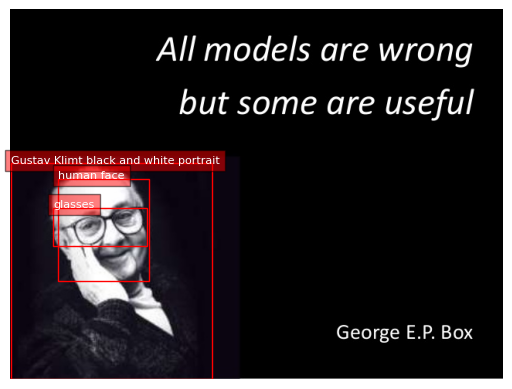

In [13]:
# Example usage for object detection
detection = run_example("<DENSE_REGION_CAPTION>")
plot_bbox(detection["<DENSE_REGION_CAPTION>"])

In [14]:
# Example usage for Optical Character Recognition (OCR)
ocr = run_example("<OCR>")
print("Detected text:", ocr)

Detected text: {'<OCR>': 'All models are wrongbut some are usefulGeorge E.P. Box'}


In [15]:
def draw_ocr_bboxes(prediction, scale=1):
    """Draw OCR bounding boxes on an image.

    Args:
        image: PIL Image object to draw on
        prediction: Dictionary containing 'quad_boxes' and 'labels' keys
        scale: Scale factor for bounding box coordinates (default: 1)

    """
    image = Image.open("../../../img/all_models_are_wrong.jpg").convert("RGB")
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction["quad_boxes"], prediction["labels"]
    colormap = [
        "red",
        "blue",
        "green",
        "purple",
        "orange",
        "yellow",
        "pink",
        "cyan",
        "magenta",
        "lime",
    ]
    for box, label in zip(bboxes, labels, strict=False):
        color = random.choice(colormap)
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=3, outline=color)
        draw.text((new_box[0] + 8, new_box[1] + 2), f"{label}", align="right", fill=color)

    display(image)

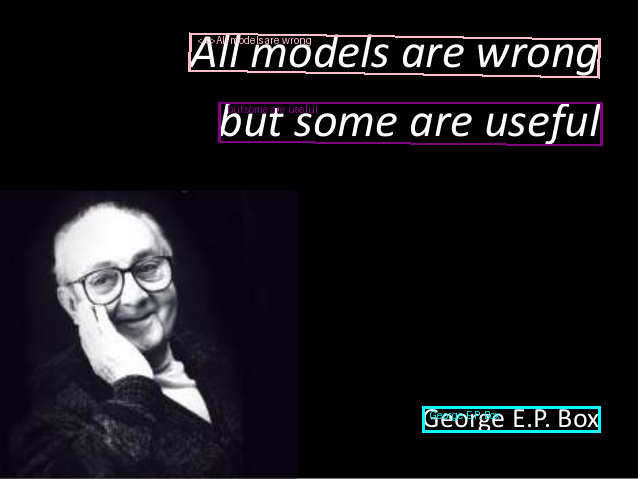

In [16]:
ocr_with_region = run_example("<OCR_WITH_REGION>")
draw_ocr_bboxes(ocr_with_region["<OCR_WITH_REGION>"])

## _Vision Transformers_

_Vision Transformers_ (_ViTs_) hebben in de voorbije jaren een belangrijke verschuiving in _computer vision_ teweeg gebracht. In tegenstelling tot traditionele _Convolutional Neural Networks_ (_CNN's_), die werken met hiërarchische convolutionele _filters_ voor _feature-extractie_, passen _ViTs_ het _transformer_-mechanisme toe dat oorspronkelijk ontwikkeld werd voor natuurlijke taalverwerking (_NLP_).

[![](https://docs.nvidia.com/nemo-framework/user-guide/24.09/_images/vit_arch.png)](https://arxiv.org/pdf/2010.11929)

Het kernidee achter _ViTs_ is verrassend eenvoudig: een afbeelding wordt behandeld als een reeks _patches_, vergelijkbaar met hoe een zin wordt opgedeeld in woorden/_tokens_.

De stappen zijn als volgt:

1. _Patch_-creatie: De invoer-afbeelding wordt opgedeeld in kleine, vierkante _patches_ (bijvoorbeeld 16×16 pixels). Elke _patch_ wordt vervolgens "platgemaakt" tot een eendimensionale vector.
2. Lineaire _embedding_: Elke _patch_-vector wordt door een lineaire laag geprojecteerd naar een hogerdimensionale ruimte, waardoor een reeks _embeddings_ ontstaat.
3. Positie-informatie: Omdat _transformers_ niet automatisch de volgorde van _patches_ kennen, worden positionele coderingen toegevoegd aan elke _embedding_. Dit behoudt informatie over de ruimtelijke positie van elke _patch_ in de oorspronkelijke afbeelding. Dit komt overeen met positionele _encoding_ van _tokens_ bij _NLP transformers_.
4. Classificatie-_token_: Om een eengemaakte representatie van de _input_ te bekomen, wordt een speciaal _learnable token_ (het _[CLS] token_) aan het begin van de reeks _patch embeddings_ toegevoegd. Na verwerking door het _transformer_ netwerk wordt deze _token_ gebruikt voor classificatietaken.  
  
De reeks _patch embeddings_ wordt verwerkt door een _transformer encoder_, die bestaat uit meerdere lagen met drie hoofdcomponenten:
1. _Self-attention_ mechanisme: Dit is het hart van de _transformer_ architectuur. Het stelt het model in staat om dynamisch het belang van elke _patch_ te wegen ten opzichte van alle andere _patches_. Hierdoor kan het model zowel lokale als globale afhankelijkheden in de afbeelding herkennen.
2. _Multi-head attention_: In plaats van één enkel _attention_-mechanisme, gebruikt het model meerdere "_attention heads_" parallel. Elke _head_ kan zich richten op verschillende aspecten of regio's van de afbeelding.
3. _Feed-forward_ netwerken: Na de _attention_-lagen worden de _embeddings_ verder verwerkt door _feed-forward_ neurale netwerken, die complexere patronen kunnen leren.

### Parameters
Er zijn veel meer verschillende soorten parameters dan bij CNNs: 
- Q, K, V matrices (_Query_, _Key_, _Value_): Drie grote gewichtsmatrices per attention head die bepalen hoe patches naar elkaar "kijken"
- _Multi-head attention_ projecties: Matrices om outputs van meerdere heads te combineren
- _Patch embedding_ matrix: Transformeert raw patches naar embeddings
- _Positionele embeddings_: Coderen de positie van elke patch (kunnen geleerd worden)
- _Feed-forward_ gewichten: Volledig verbonden lagen na attention
- _[CLS] token_: Leerbare classificatie-token

### Taken
Er is geen verschil ten opzichte van CNNs qua type taken. Wel is het zo dat ViTs van nature erg geschikt zijn om via _self-supervision_ getraind te worden (zoals _Language Transformers_).

:::{note} 🌍 DINOv3
:icon: false
:class: dropdown
Het DINOv3 model van Meta is een krachtig embedding-model gebaseerd op de ViT architectuur en volledig via self-supervision getraind. Het produceert zeer rijke features die zelfs voor zeer geavanceerde taken zoals _keypoint matching_ gebruikt kunnen worden.

[![Hugging Face Spaces](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue)](https://huggingface.co/spaces/merve/DINOv3-keypoint-matching)
:::

### Voordelen

- Globaal begrip: _ViTs_ kunnen relaties tussen verafgelegen delen van een afbeelding vastleggen vanaf de vroegste lagen, wat nuttig is voor taken die een holistisch begrip vereisen. Dit wijkt af van traditionele CNNs waar de hiërarchische structuur impliceert dat systematische relaties tussen verafgelegen delen enkel op hogere niveaus geleerd kunnen worden.
- Flexibiliteit: Het ontbreken van sterke architecturale beperkingen maakt _ViTs_ aanpasbaar voor diverse (geavanceerde) taken en modaliteiten.
- Schaalbaarheid: Prestaties verbeteren consistent wanneer modellen groter worden en meer data beschikbaar is.

### Nadelen

- Data-intensief: _ViTs_ hebben vaak enorm grote _datasets_ nodig (miljoenen afbeeldingen) om goed te presteren.
- Rekenintensief: Het _self-attention_ mechanisme heeft kwadratische complexiteit, wat leidt tot hoge geheugen- en rekenvereisten, vooral bij hoge resoluties.
- Interpreteerbaarheid: Het analyseren van het gedrag is nog moeilijker dan bij CNNs omdat er ook geen _feature maps_ aan te pas komen.
- Gevoeligheid voor transformaties: _ViTs_ kunnen minder robuust zijn voor ruimtelijke transformaties (rotatie, spiegeling) tenzij expliciet getraind op dergelijke variaties.